There are many missing values in the data. We would like to see where these missing values are most pronounced in terms of time. If missing values are especially present during the night and midday, then it seems reasonable to assume that such missing values are the result of too little traffic being present.

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from data_loading import *
from plotting import *

In [2]:
path = "/Users/Teun/Downloads/Data/Alle FCD PZH juli 2017 zonder meta_20170726T090051_407"

df = load_FCD(path)

Loading took 85.62 seconds
Data frame has shape (22558642, 9)


In [3]:
df["dataError"].value_counts()

0    16837463
1     5721179
Name: dataError, dtype: int64

In [4]:
valid_data = df[df["dataError"] == 0].groupby([df.periodStart.dt.hour, df.periodStart.dt.minute])["dataError"].value_counts().sort_index().values.tolist()
invalid_data = df[df["dataError"] == 1].groupby([df.periodStart.dt.hour, df.periodStart.dt.minute])["dataError"].value_counts().sort_index().values.tolist()

/usr/local/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


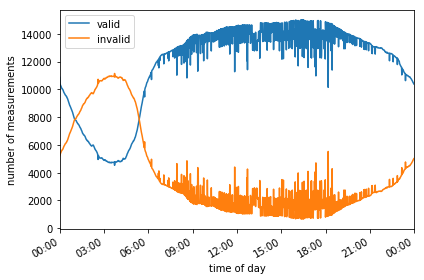

In [5]:
plot_over_day([valid_data, invalid_data], ["valid", "invalid"], save_location="../thesis/figures/valid_measurements.pdf")